In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr
import scipy.stats as stats
from scipy.stats import kruskal


In [116]:
calendar_df = pd.read_csv(r'Boston Airbnb\calendar.csv')
listings_df = pd.read_csv(r'Boston Airbnb\listings.csv')
reviews_df = pd.read_csv(r'Boston Airbnb\reviews.csv')
print(calendar_df.shape, listings_df.shape, reviews_df.shape)

(1308890, 4) (3585, 95) (68275, 6)


In [17]:
calendar_df[calendar_df['available'] == 't']

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00
...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00
1308876,14504422,2016-09-19,t,$62.00
1308877,14504422,2016-09-18,t,$62.00
1308878,14504422,2016-09-17,t,$62.00


In [29]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [102]:
def convert_to_float(x):
    if pd.notna(x):  # Check if 'x' is not NaN
        return float(x[1:].replace(',', ''))
    else:
        return x  # Return NaN as it is

In [117]:
print('calendar_df.duplicated:', calendar_df.duplicated().sum())
calendar_df = calendar_df.drop_duplicates()
calendar_df['price'] = calendar_df['price'].apply(convert_to_float)
calendar_df = calendar_df.rename({'price':'calendar_price'})
print(calendar_df.shape)

calendar_df.duplicated: 365
(1308525, 4)


In [118]:
for x in ['price','weekly_price','monthly_price']:
    listings_df[x] = listings_df[x].apply(convert_to_float)
print(calendar_df['price'].dtypes)

float64


In [119]:
print('listings_df.shape:',listings_df.shape)
infor_df = pd.merge(calendar_df,listings_df, left_on='listing_id', right_on='id',how='inner')
print('infor_df.shape:',infor_df.shape)


listings_df.shape: (3585, 95)
infor_df.shape: (1308525, 99)


In [ ]:
numerical_columns = []
for i in range(len(infor_df.dtypes)):
    if infor_df.dtypes[i] != object:
        numerical_columns.append(infor_df.columns[i])

for x in ['scrape_id','neighbourhood_group_cleansed', 'has_availability', 'license', 'jurisdiction_names']:
    numerical_columns.remove(x)

len(numerical_columns)

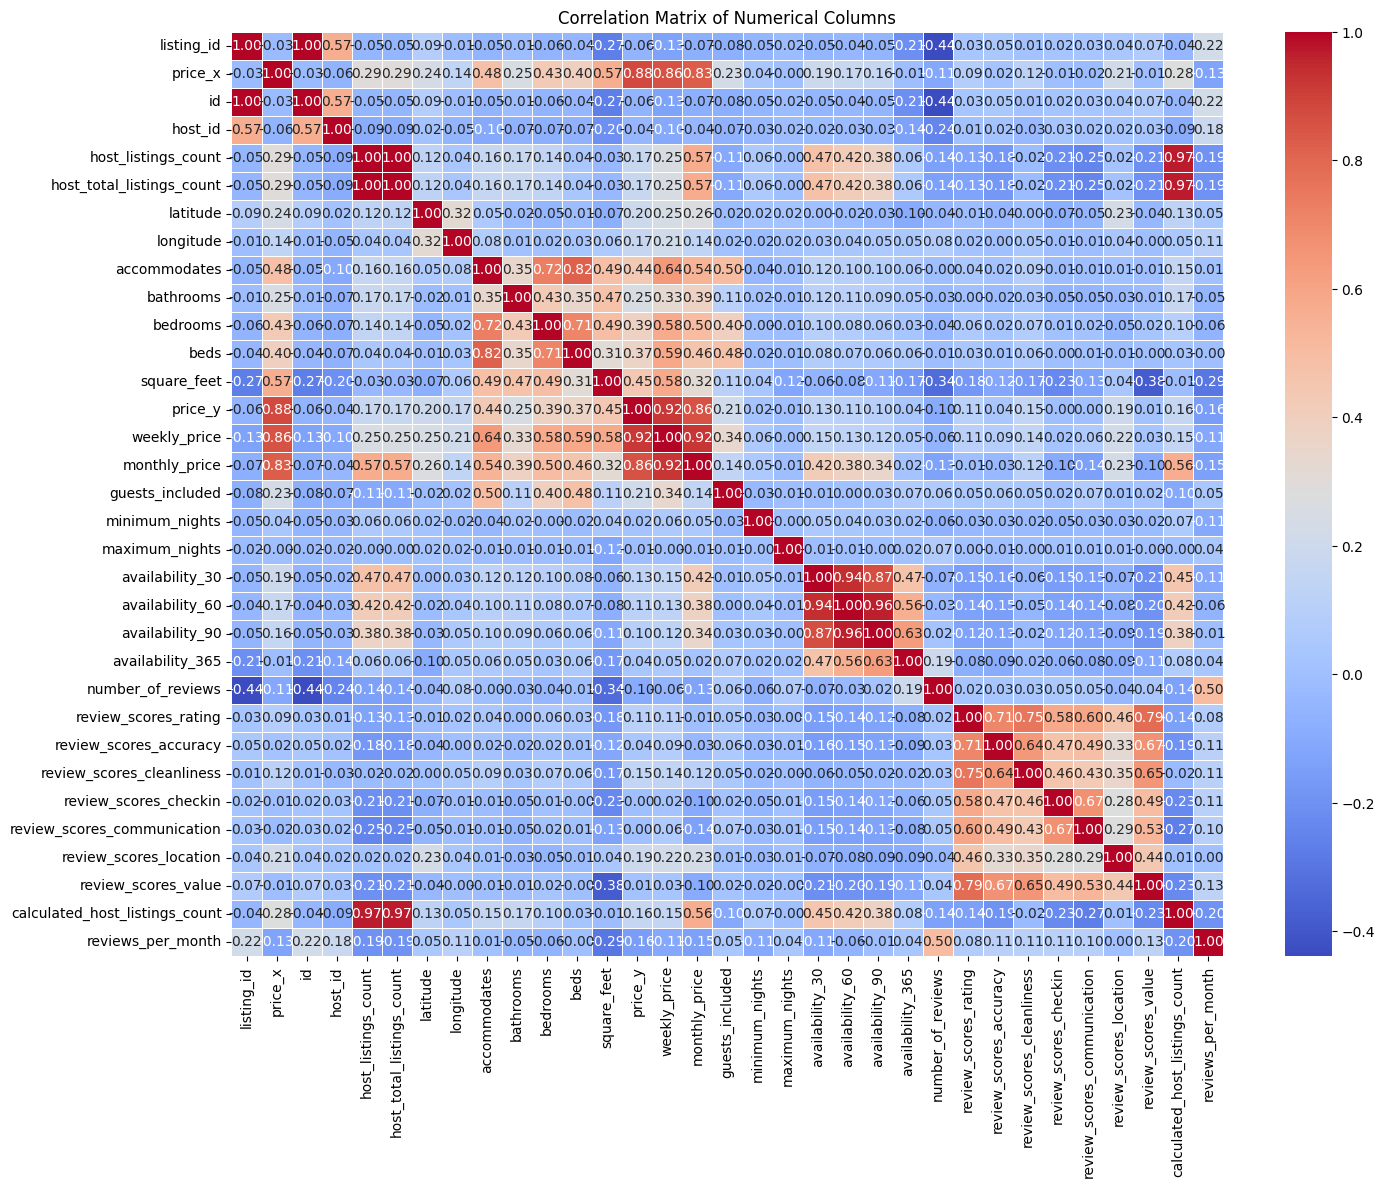

In [121]:
# Calculate the correlation matrix
correlation_matrix = infor_df[numerical_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 12))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [155]:
check_categorical_variable = 'city'
# Assuming 'df' is your DataFrame, 'num_col' is your numerical column, and 'multi_cat_col' is your categorical column with more than two categories
sample_args = []
unique_values = infor_df[check_categorical_variable].unique()
for i in [0,1,2]: # len(unique_values) = 39
    sample_args.append(infor_df['price_y'][infor_df[check_categorical_variable] == unique_values[i]])
f_value, p_value = stats.f_oneway(*sample_args)

print(f"F-value: {f_value}, P-value: {p_value}")


F-value: 432.42730105939916, P-value: 1.8401362323277064e-188
